In [2]:
import json
with open('./artifacts/kaggle.json', 'r') as file:
    kaggle = json.load(file)

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = kaggle['username']
os.environ['KAGGLE_KEY'] = kaggle['key']

In [4]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [5]:
api.dataset_download_files('uciml/iris', path='./artifacts/iris', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/uciml/iris


In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('./artifacts/iris/Iris.csv')

In [8]:
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
39,40,5.1,3.4,1.5,0.2,Iris-setosa
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
21,22,5.1,3.7,1.5,0.4,Iris-setosa
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
6,7,4.6,3.4,1.4,0.3,Iris-setosa


In [9]:
data = data.drop('Id', axis=1)

In [10]:
data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
58,6.6,2.9,4.6,1.3,Iris-versicolor
138,6.0,3.0,4.8,1.8,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica
56,6.3,3.3,4.7,1.6,Iris-versicolor


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

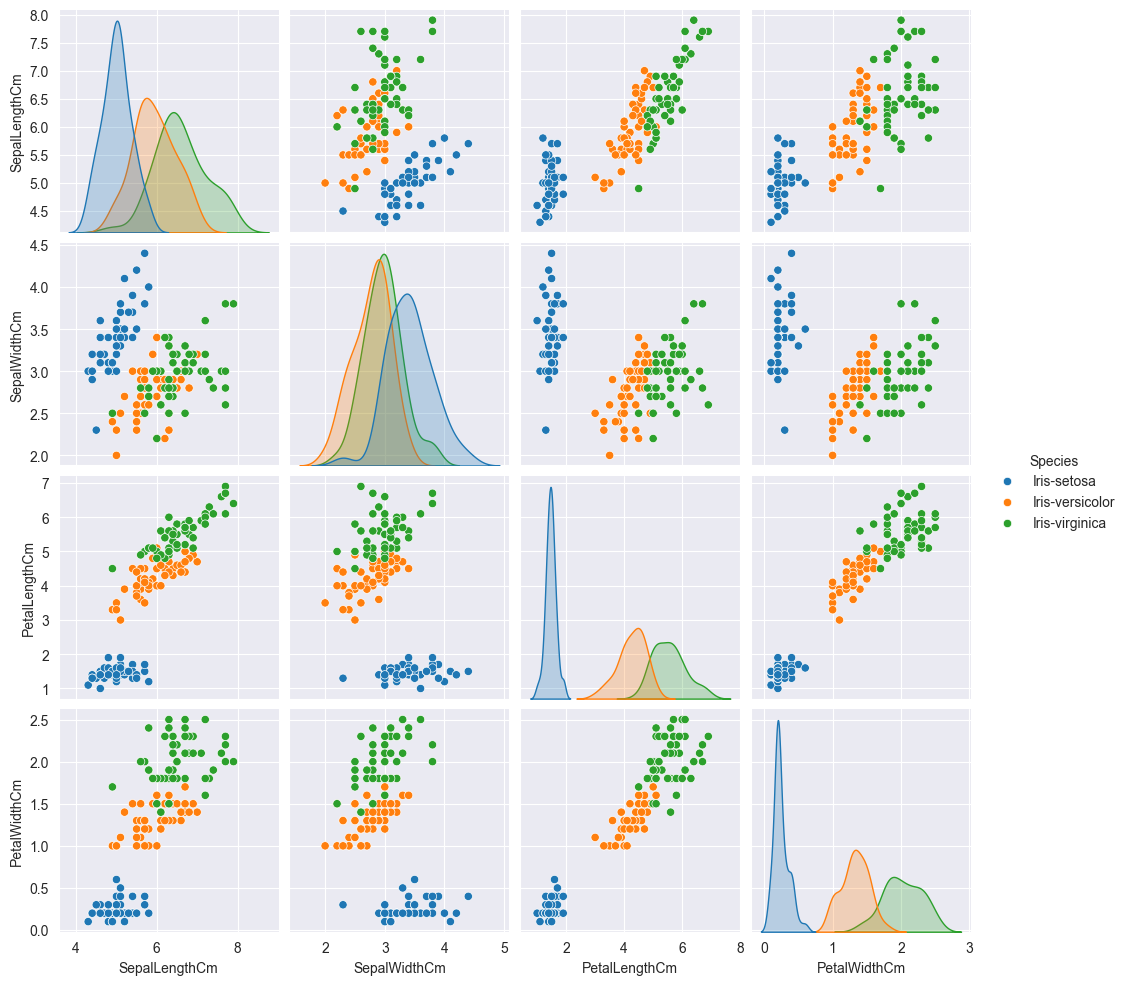

In [13]:
import seaborn as sns
sns.pairplot(data, hue='Species')

In [14]:
x = data.drop('Species', axis=1)
x.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
67,5.8,2.7,4.1,1.0
25,5.0,3.0,1.6,0.2
92,5.8,2.6,4.0,1.2
99,5.7,2.8,4.1,1.3
122,7.7,2.8,6.7,2.0


In [15]:
y = data['Species']
y.sample(5)

106     Iris-virginica
122     Iris-virginica
87     Iris-versicolor
19         Iris-setosa
107     Iris-virginica
Name: Species, dtype: object

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

SVC()

In [18]:
model.kernel

'rbf'

In [19]:
pred = model.predict(x_test)
pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [20]:
y_test

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: Species, dtype: object

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
accuracy_score(y_test, pred)

1.0

In [23]:
confusion_matrix(y_test, pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])